# Линейная регрессия с нуля

In [1]:
from IPython import display
from matplotlib import pyplot as plt 
import torch
import random

%matplotlib inline

## Генерируем данные

In [2]:
num_inputs = 2 # количество признаков (входов)
num_examples = 1000 # количество значений
true_w = torch.tensor([2, -3.4]) # истинные значения весов
true_b = 4.2 # Истинное значение смещения
features = torch.randn((num_examples, num_inputs)) # Генерируем набор значений
labels = torch.mv(features, true_w) + true_b # Рассчитываем метки
labels += torch.randn(labels.shape) # Добавляем к меткам случайный шум

In [3]:
print(true_w)
print(true_b)

tensor([ 2.0000, -3.4000])
4.2


In [4]:
print(features.shape)

torch.Size([1000, 2])


In [5]:
print(features[:10])

tensor([[ 0.0269, -0.7857],
        [-0.4649, -1.2503],
        [-0.9602, -0.4017],
        [-1.3672, -1.0283],
        [ 0.2541, -0.4093],
        [-0.4399, -0.9647],
        [ 1.2102,  0.4632],
        [ 0.6100, -1.8920],
        [ 0.5459,  1.6718],
        [ 1.9961, -0.4261]])


In [6]:
print(labels.size())

torch.Size([1000])


## Визуализируем

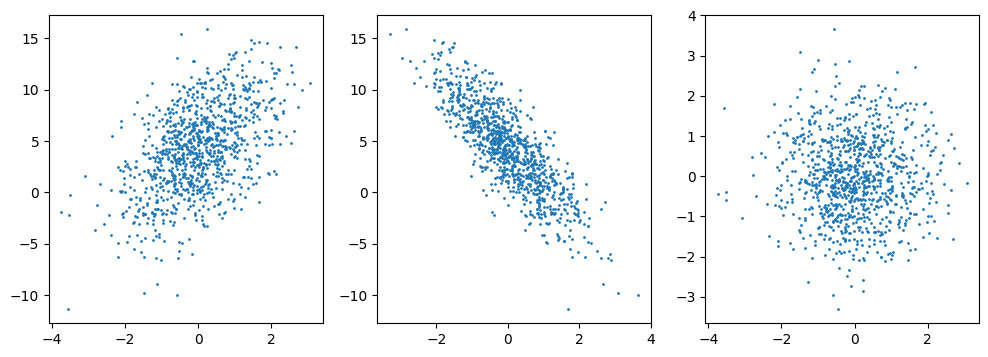

In [7]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.scatter(features[:, 0], labels, 1)
plt.subplot(132)
plt.scatter(features[:, 1], labels, 1)
plt.subplot(133)
plt.scatter(features[:, 0], features[:, 1], 1)
plt.show();

## Чтение данных

### Задаем итератор

In [8]:
def data_iter(batch_size, featires, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = indices[i: min(i + batch_size, num_examples)]
        yield featires[j, :], labels[j]

### Выводим один батч размером = 10

In [9]:
batch_size = 10

In [10]:
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.4274,  0.6904],
        [-0.1733, -0.4707],
        [-1.0580,  2.1229],
        [-0.4286,  2.3286],
        [ 1.2957,  1.7652],
        [ 0.4011, -0.8933],
        [ 0.2403, -2.5819],
        [-1.3503, -1.7952],
        [-0.5807, -0.4318],
        [-0.3798, -0.9615]]) 
 tensor([ 3.8649,  6.0400, -4.3675, -4.9174, -0.4462,  7.5502, 12.0875,  7.6490,
         5.5969,  4.6347])


## Создаем модель для обучения

### Задаем начальные значения параметров (инициализируем параметры):

In [11]:
w = torch.randn((num_inputs))
b = torch.zeros((1,))

In [12]:
print(f"w = {w}")
print(f"b = {b}")

w = tensor([ 1.2223, -0.5821])
b = tensor([0.])


In [13]:
# подулючаем градиенты
w.requires_grad_()
b.requires_grad_()

tensor([0.], requires_grad=True)

### Задаем функции

In [14]:
# line model
def linreg(X, w, b):
    return torch.mv(X,w) + b

In [15]:
# squared loss function
def squared_loss(y_hat, y):
    return ((y_hat - y.reshape(y_hat.shape))** 2).mean() # Выравниваем размерности тензоров

In [16]:
# обновление весов (оптимизатор)
def sgd(params, lr):
    for param in params:
        param.data[:] = param - lr*param.grad


### Задаем гиперпараметры: количество эпох и шаг обучения

In [17]:
num_epochs = 10
lr = 0.01

### Обучающий цикл

In [18]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        w = w.detach()
        b = b.detach()
        w.requires_grad_()
        b.requires_grad_()

        l = squared_loss(linreg(X, w, b), y)
        l.backward()
        sgd([w, b], lr)
    train_l = squared_loss(linreg(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))    

epoch 1, loss 1.382341
epoch 2, loss 0.966416
epoch 3, loss 0.953027
epoch 4, loss 0.952929
epoch 5, loss 0.953307
epoch 6, loss 0.953188
epoch 7, loss 0.955173
epoch 8, loss 0.955395
epoch 9, loss 0.953265
epoch 10, loss 0.953546


### Оценка качества модели

In [19]:
print('Error in estimating w', true_w - w.reshape(true_w.shape))
print('Error in estimating b', true_b - b)
print(w)
print(b)

Error in estimating w tensor([0.0023, 0.0383], grad_fn=<SubBackward0>)
Error in estimating b tensor([-0.0736], grad_fn=<RsubBackward1>)
tensor([ 1.9977, -3.4383], requires_grad=True)
tensor([4.2736], requires_grad=True)


## Эксперименты

In [72]:
datas = torch.tensor([[1, 1, 1], [2, 2, 2], [3, 3, 3]], dtype=float)
datas

tensor([[1., 1., 1.],
        [2., 2., 2.],
        [3., 3., 3.]], dtype=torch.float64)

In [73]:
w = torch.ones((3,), dtype=float) * 0.5
w

tensor([0.5000, 0.5000, 0.5000], dtype=torch.float64)

In [74]:
b = torch.ones((1,), dtype=float) * 2
b

tensor([2.], dtype=torch.float64)

In [ ]:
torch.mv(datas, w)

tensor([1.5000, 3.0000, 4.5000], dtype=torch.float64)

In [76]:
torch.mv(datas, w) + b

tensor([3.5000, 5.0000, 6.5000], dtype=torch.float64)

In [77]:
linreg(datas, w, b)

tensor([3.5000, 5.0000, 6.5000], dtype=torch.float64)

In [78]:
linreg(datas, w, b).shape

torch.Size([3])